In [2]:
import os
import glob

import numpy as np

import matplotlib.pyplot as plt
from scipy.ndimage import rotate

import itk

import site
site.addsitedir("../ARGUS")

from ARGUS_Timing import *
from ARGUS_IO import *

from ARGUS_onsd_ar_inference import ARGUS_onsd_ar_inference

In [3]:
onsd_ar = ARGUS_onsd_ar_inference(config_file_name="../ARGUS/ARGUS_onsd_ar.cfg", network_name="final", device_num=0)

In [4]:
onsd_ar_best_models = [[0,0]]
onsd_ar.num_models = len(onsd_ar_best_models)

for i,r in enumerate(onsd_ar_best_models):
    model_name = os.path.join("Results", "onsd_vfold_run"+str(r[0]), "best_model_"+str(r[1])+".pth")
    onsd_ar.load_model(i, model_name)

In [5]:
vids = glob.glob("./Data_ONSD/original/Positives/*/*mp4")

./Data_ONSD/original/Positives/139/4. 139.1 Right Long_Video 1.mp4


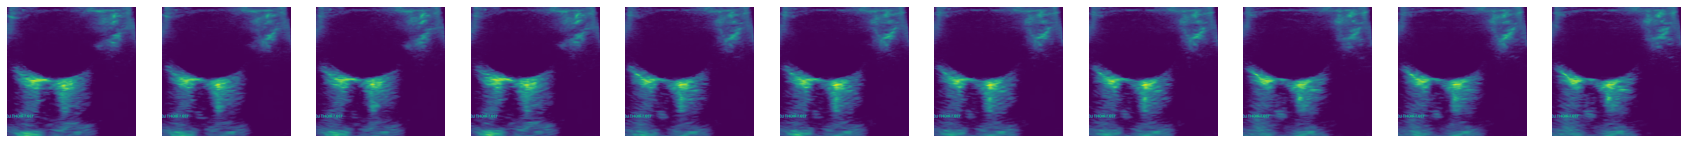

./Data_ONSD/original/Positives/106/11. 106.1 Left Long Video 1.mp4


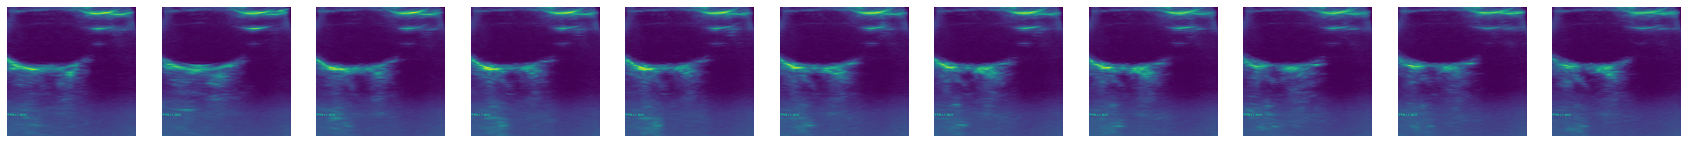

./Data_ONSD/original/Positives/40/8. 40.1 Left Long_Video 1.mp4


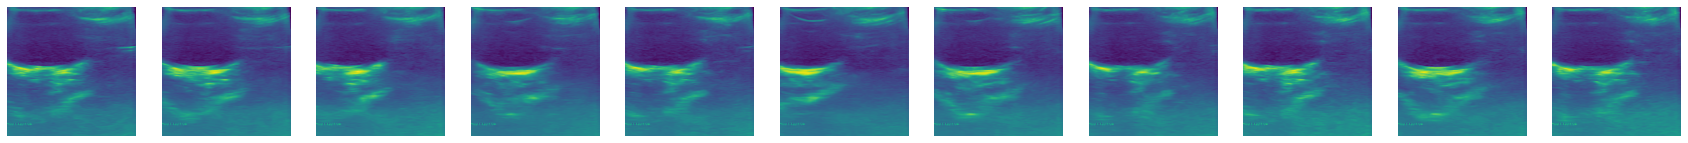

./Data_ONSD/original/Positives/117/6. 117.1 Left Lat_Video 1.mp4


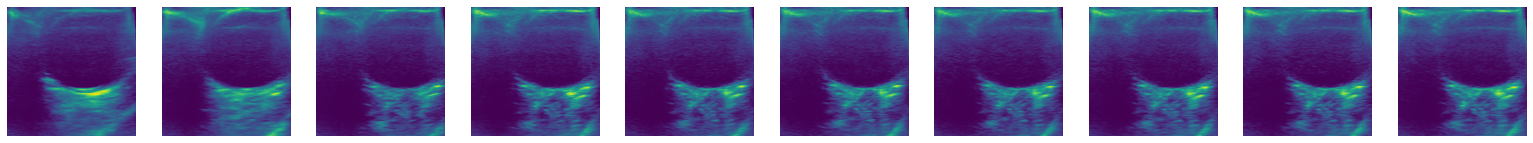

./Data_ONSD/original/Positives/239/2. 239.1 Right_Lat_Video 1.mp4


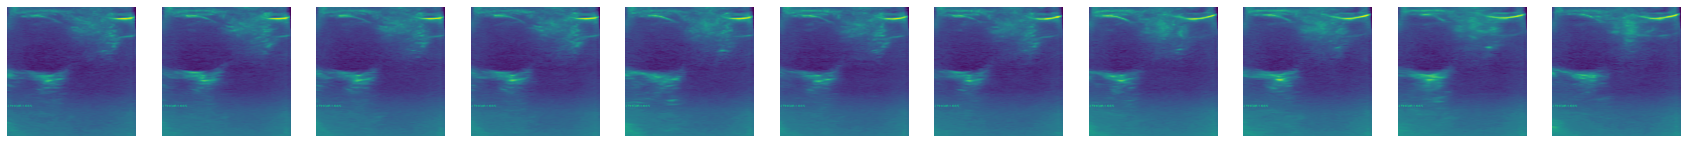

./Data_ONSD/original/Positives/50/2. 50.3 Right_Lat_Video 1.mp4


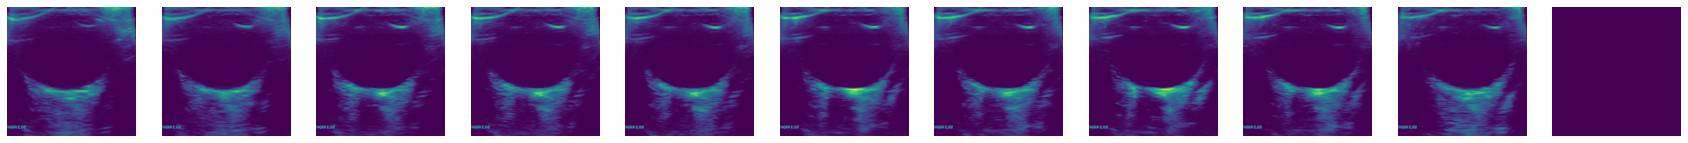

./Data_ONSD/original/Positives/165/2. 165.4 Right_Lat_Video 1.mp4


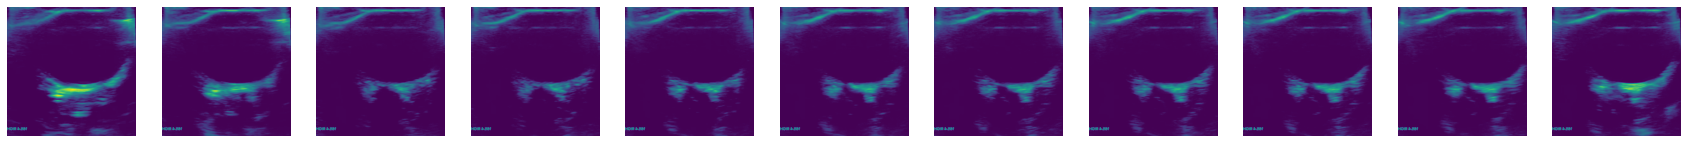

./Data_ONSD/original/Positives/158/2. 158.1 Right_Lat_Video 1.mp4


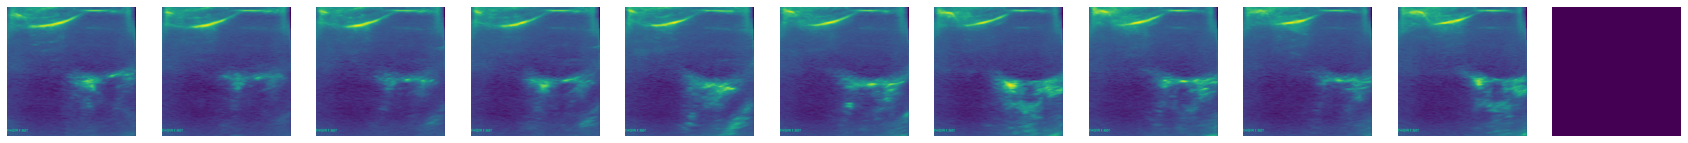

./Data_ONSD/original/Positives/64/2. 64.1 Right Lat_Video 1.mp4


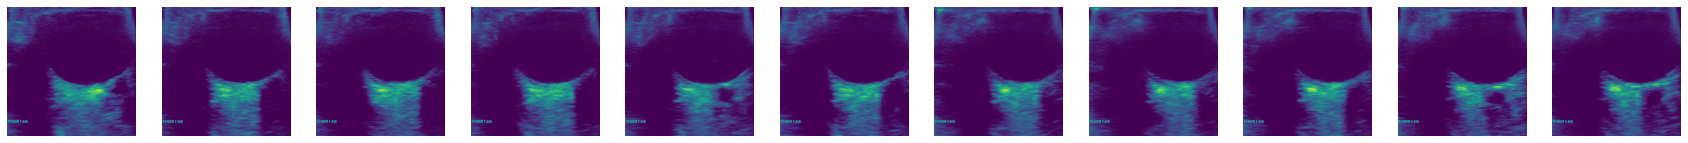

./Data_ONSD/original/Positives/36/4. 36.1 Right Long_Video 1.mp4


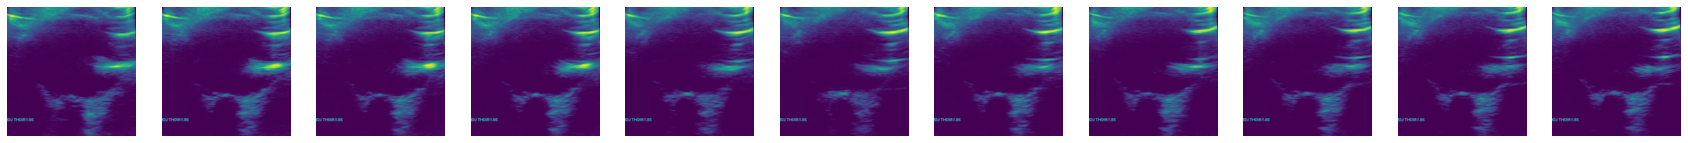

./Data_ONSD/original/Positives/66/4. 66.1 Right_Long_Video 1.mp4


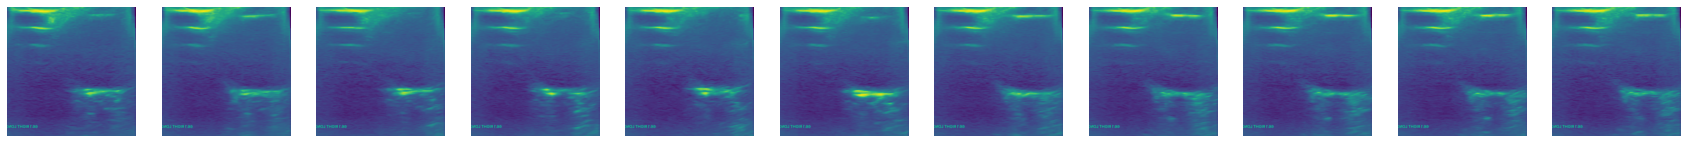

./Data_ONSD/original/Positives/87/4. 87.2 Right Long_Video 1.mp4


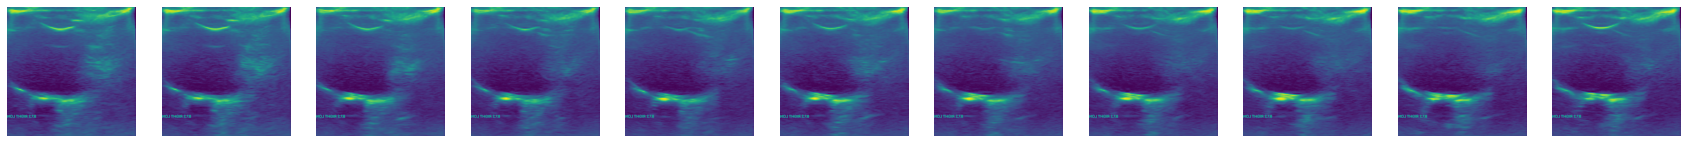

In [7]:
for i in range(len(vids)):
    print(vids[i])
    vid = ARGUS_load_video(vids[i])
    onsd_ar.volume_preprocess(vid)
    img = onsd_ar.input_image
    num_slices = img.shape[0]
    plt.figure(figsize=[30, 10])
    step = num_slices//10
    for c in range(0,num_slices,step):
        plt.subplot(
            1,
            int(num_slices/step + 1),
            int(c/step + 1),
        )
        plt.axis('off')
        plt.imshow(rotate(img[c, :, :],270))
    plt.show()